In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing

In [2]:
data = pd.read_csv('select_data.csv')
#data.dropna(axis=0, how='all')
np.shape(data)

(20327, 17)

In [3]:
X = data.iloc[:,1:]
Scaled_X = preprocessing.scale(X)
y = data.iloc[:,0]

In [4]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

In [5]:
forest.fit(Scaled_X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 13 (0.400558)
2. feature 12 (0.266257)
3. feature 10 (0.046444)
4. feature 1 (0.042281)
5. feature 9 (0.038884)
6. feature 3 (0.029104)
7. feature 11 (0.025988)
8. feature 5 (0.024774)
9. feature 8 (0.023951)
10. feature 7 (0.023724)
11. feature 0 (0.019580)
12. feature 15 (0.014272)
13. feature 6 (0.013080)
14. feature 14 (0.012502)
15. feature 2 (0.012124)
16. feature 4 (0.006478)


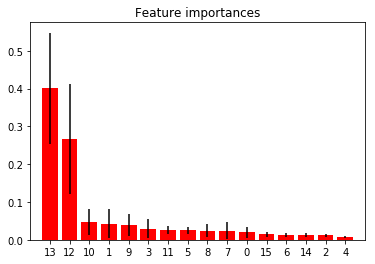

In [6]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()